In [1]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error


def readDatas(dataPath: str):
    df = pd.read_csv(dataPath,delimiter=',', header='infer')
    return df.dropna()

def plotDataDistribution(df_world_happiness):
    fig,axes = plt.subplots(nrows=2,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Family"])
    axes[1].set_title("Family")
    plt.show()

def plotData(df_world_happiness):
    fig,axes = plt.subplots()

    axes.plot(df_world_happiness["Family"],df_world_happiness["Happiness.Score"], 'ro') 
    axes.set_xlabel('Family')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between Family and Happiness')
    plt.show()

def getTrainingAndValidationSets(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [df_world_happiness["Family"].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Family"].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationDatas(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')   #train data are plotted by red and circle sign
    plt.plot(validationInputSet, validationOutputSet, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
    axes.set_title("train and validation data")
    axes.set_xlabel('Family')
    axes.set_ylabel('happiness')
    plt.legend()
    plt.show()

def getRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = linear_model.LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

def plotRegressor(df_world_happiness):

    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  #train data are plotted by red and circle sign
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('Family')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

def getErrors(df_world_happiness):
    _,_,validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


/tmp/ipykernel_1632/265231105.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_world_happiness_v1 = readDatas('data/v1_world-happiness-report-2017.csv')

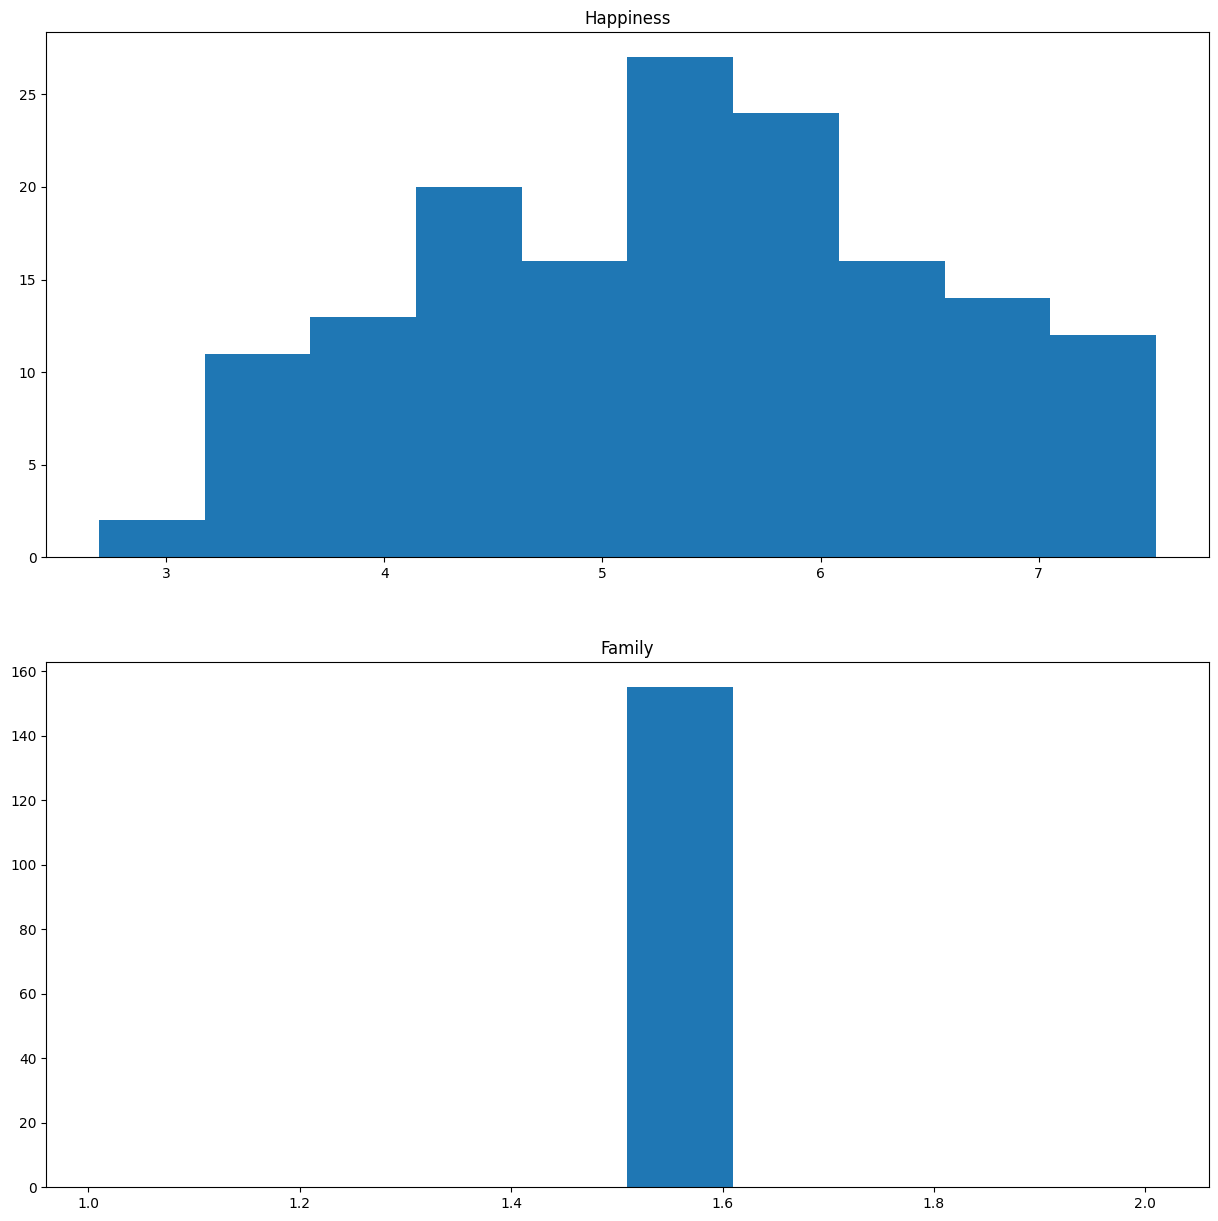

In [3]:
plotDataDistribution(df_world_happiness_v1)

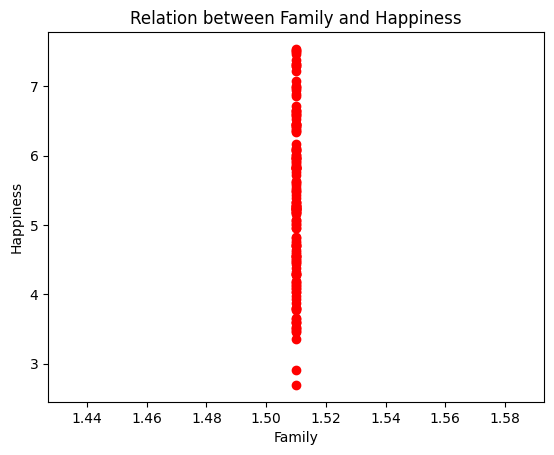

In [4]:
plotData(df_world_happiness_v1)

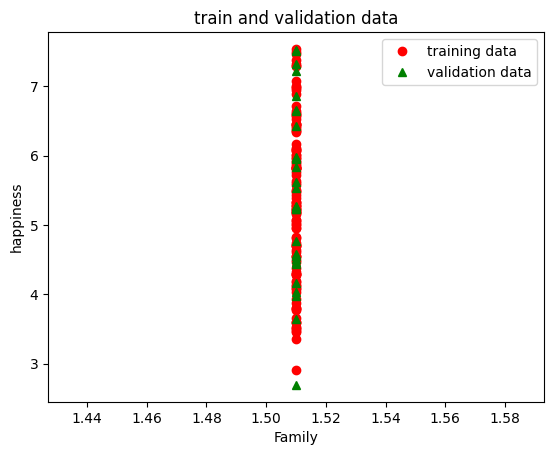

In [5]:
plotTrainingAndValidationDatas(df_world_happiness_v1)

In [6]:
regressor = getRegressor(df_world_happiness_v1)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  1.8452857904405988  +  2.3797702518547674  * x


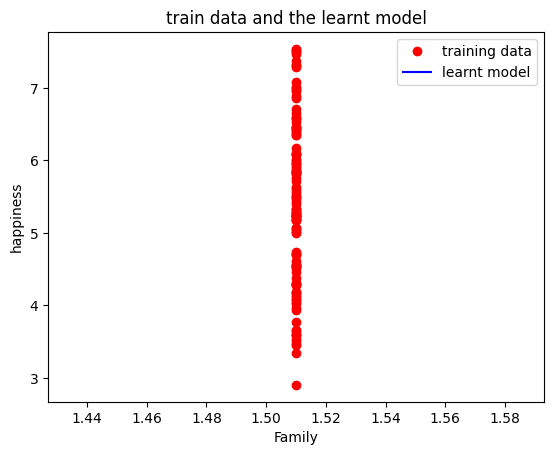

In [7]:
plotRegressor(df_world_happiness_v1)

In [8]:
mErr, cErr = getErrors(df_world_happiness_v1)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 1.1179933702852933
Computed error: 1.1179933702852933


In [9]:
df_world_happiness_v2 = readDatas('datas/v2_world-happiness-report-2017.csv')

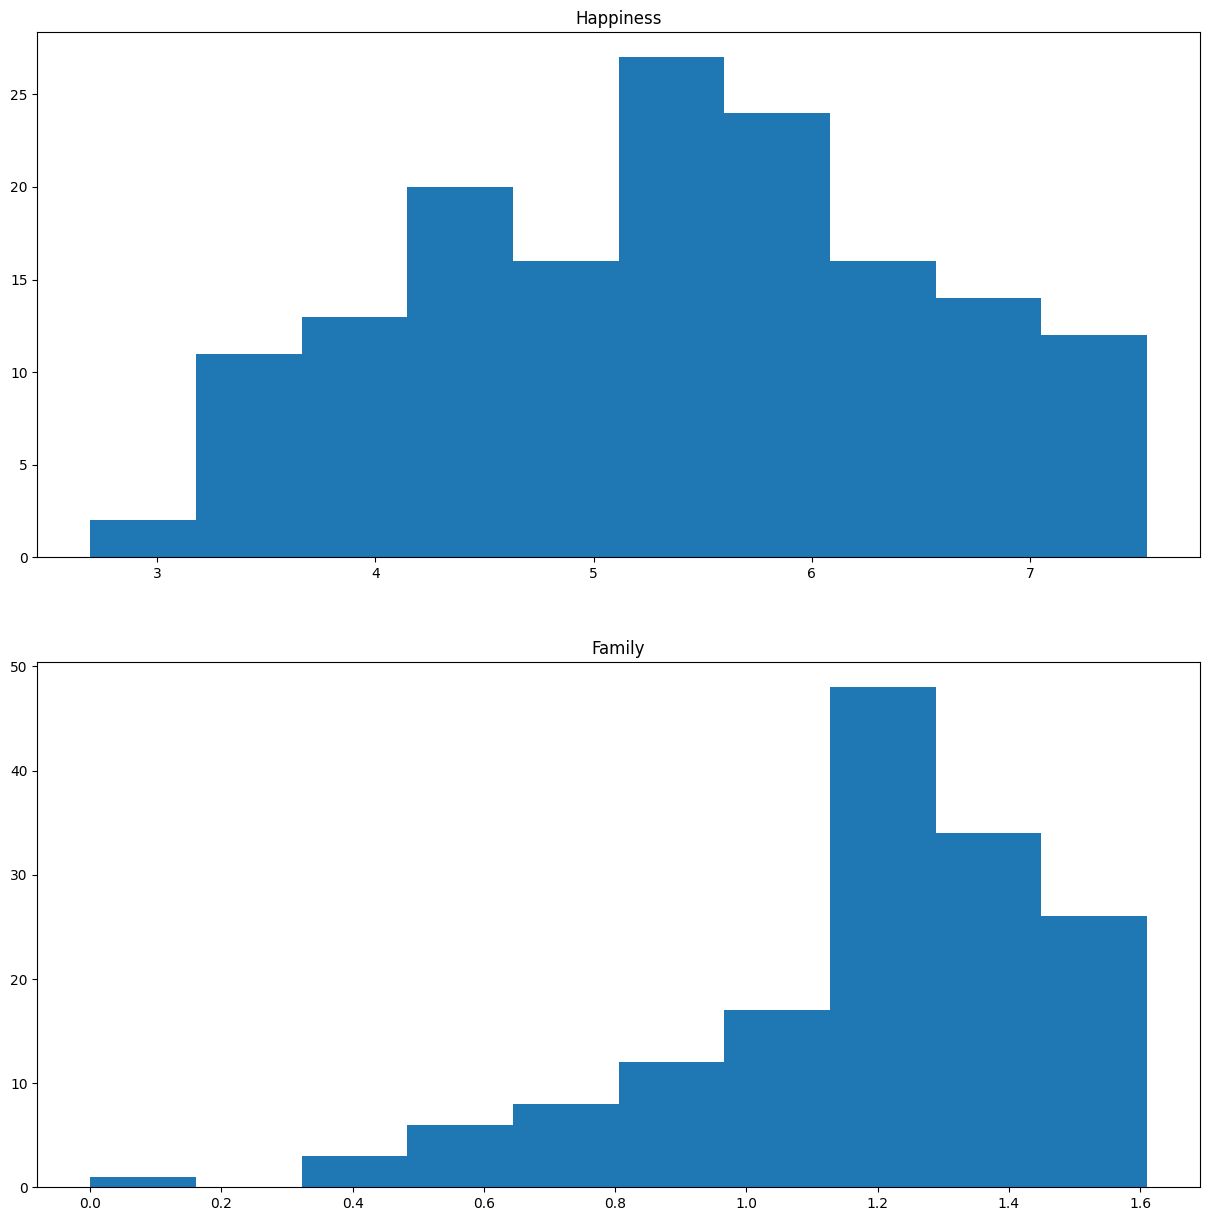

In [10]:
plotDataDistribution(df_world_happiness_v2)

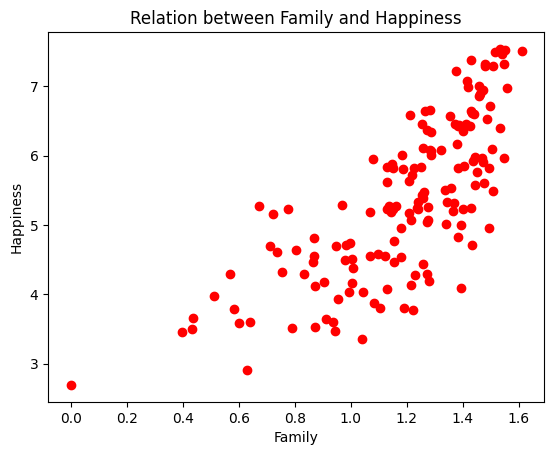

In [11]:
plotData(df_world_happiness_v2)

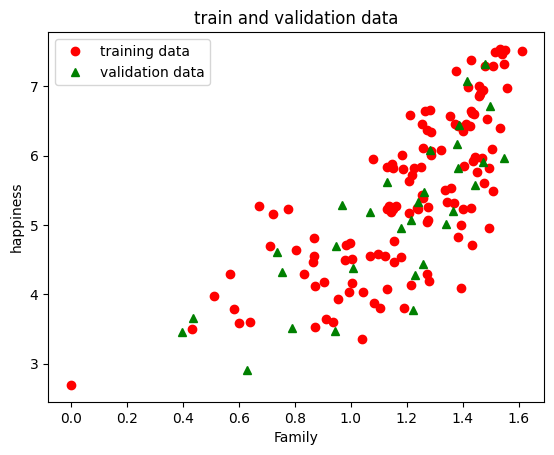

In [12]:
plotTrainingAndValidationDatas(df_world_happiness_v2)

In [13]:
regressor = getRegressor(df_world_happiness_v2)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  1.7717983017554118  +  3.0420669018609803  * x


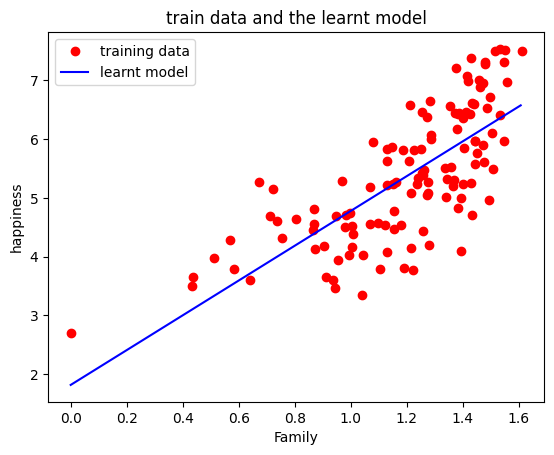

In [14]:
plotRegressor(df_world_happiness_v2)

In [15]:
mErr, cErr = getErrors(df_world_happiness_v2)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.5637756296978619
Computed error: 0.5637756296978619


In [16]:
df_world_happiness_v3 = readDatas('datas/v3_world-happiness-report-2017.csv')

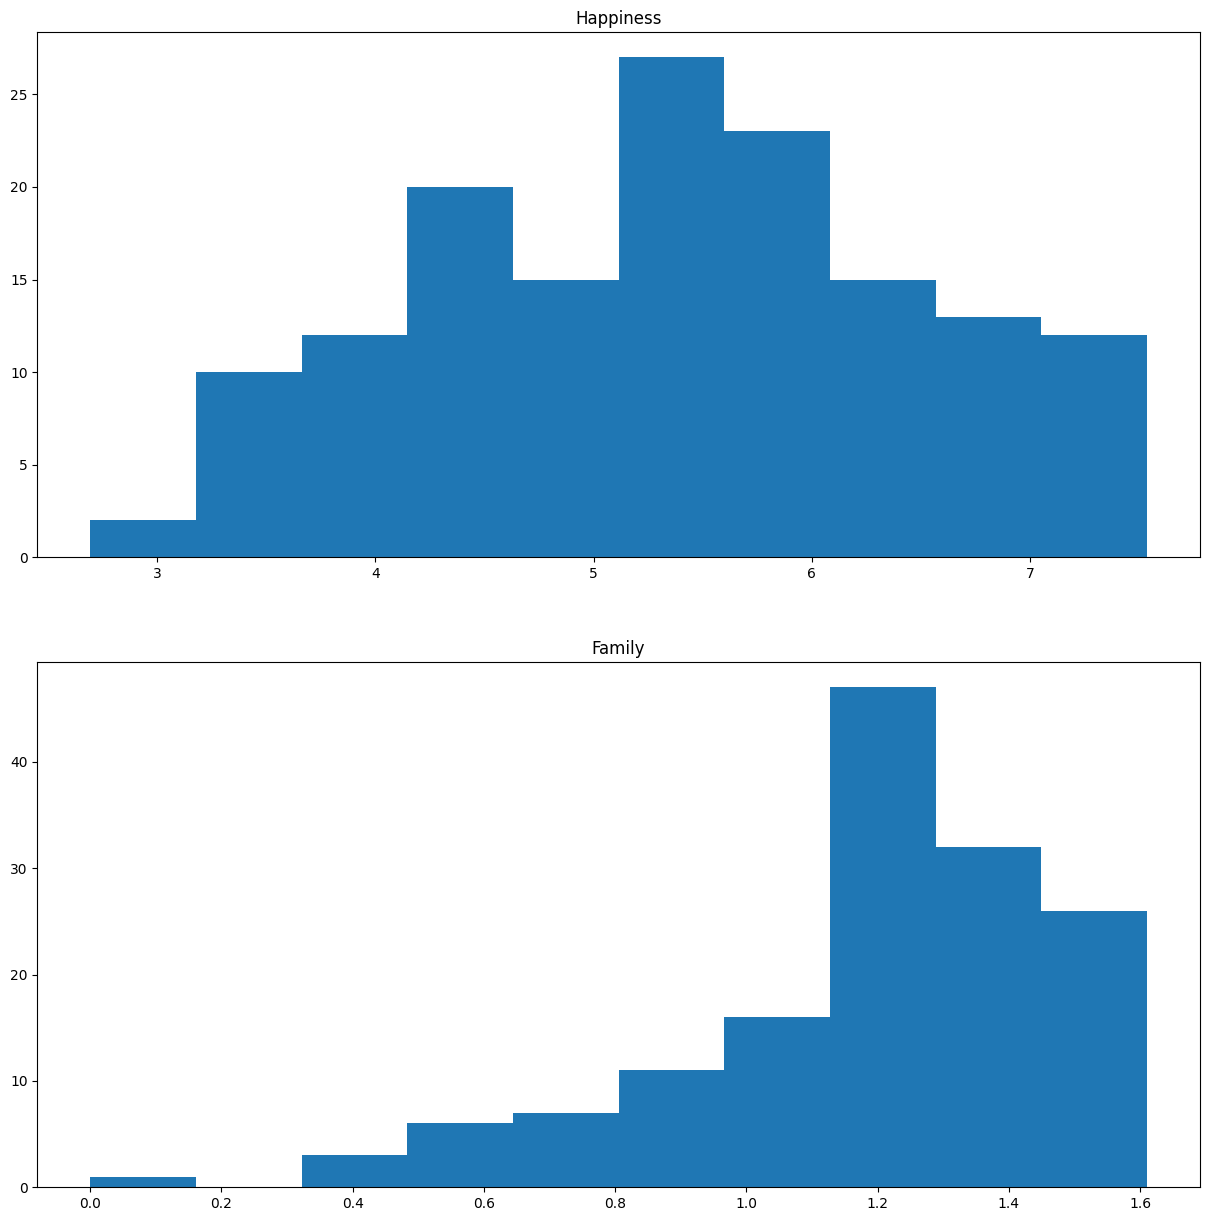

In [17]:
plotDataDistribution(df_world_happiness_v3)

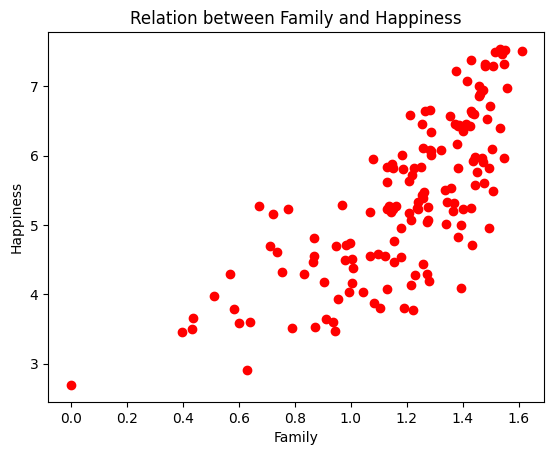

In [18]:
plotData(df_world_happiness_v3)

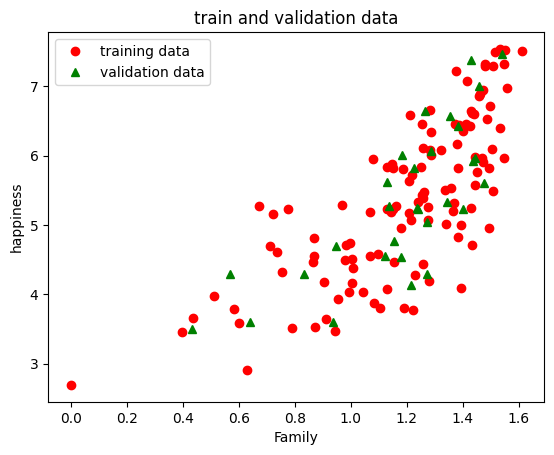

In [19]:
plotTrainingAndValidationDatas(df_world_happiness_v3)

In [20]:
regressor = getRegressor(df_world_happiness_v3)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  1.9698028382232944  +  2.888237816339152  * x


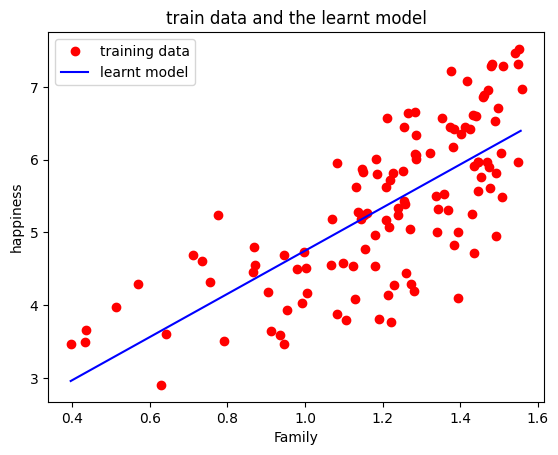

In [21]:
plotRegressor(df_world_happiness_v3)

In [22]:
mErr, cErr = getErrors(df_world_happiness_v3)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.6970596525216025
Computed error: 0.6970596525216025
